In [4]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [5]:
import networkx
from networkx.readwrite import json_graph #此格式可存入AQL

In [7]:
#建立網路節點資訊
node_info={
    'A':{'weight':numpy.random.randint(1,100),'id':0},
    'B':{'weight':numpy.random.randint(1,100),'id':1},
    'C':{'weight':numpy.random.randint(1,100),'id':2},
    'D':{'weight':numpy.random.randint(1,100),'id':3},
    'E':{'weight':numpy.random.randint(1,100),'id':4},
    'F':{'weight':numpy.random.randint(1,100),'id':5},
    'G':{'weight':numpy.random.randint(1,100),'id':6},
    'H':{'weight':numpy.random.randint(1,100),'id':7},
    'I':{'weight':numpy.random.randint(1,100),'id':8},
    'J':{'weight':numpy.random.randint(1,100),'id':9},
    
}

In [8]:
node_info

{'A': {'weight': 91, 'id': 0},
 'B': {'weight': 50, 'id': 1},
 'C': {'weight': 99, 'id': 2},
 'D': {'weight': 96, 'id': 3},
 'E': {'weight': 25, 'id': 4},
 'F': {'weight': 89, 'id': 5},
 'G': {'weight': 4, 'id': 6},
 'H': {'weight': 20, 'id': 7},
 'I': {'weight': 30, 'id': 8},
 'J': {'weight': 26, 'id': 9}}

In [9]:
G=networkx.Graph()

In [10]:
#建立網路節點
for node in range(ord('A'),ord('J')+1): #ord轉ASCIIL
    G.add_node(chr(node),weight=node_info[chr(node)]['weight'])#chr轉字元

In [11]:
list(G.nodes(data=True))

[('A', {'weight': 91}),
 ('B', {'weight': 50}),
 ('C', {'weight': 99}),
 ('D', {'weight': 96}),
 ('E', {'weight': 25}),
 ('F', {'weight': 89}),
 ('G', {'weight': 4}),
 ('H', {'weight': 20}),
 ('I', {'weight': 30}),
 ('J', {'weight': 26})]

In [12]:
list(G.nodes(data='weight')) #篩選出weight欄位

[('A', 91),
 ('B', 50),
 ('C', 99),
 ('D', 96),
 ('E', 25),
 ('F', 89),
 ('G', 4),
 ('H', 20),
 ('I', 30),
 ('J', 26)]

In [13]:
G.add_edge('A','B')
G.add_edge('B','C')
G.add_edge('B','D')
G.add_edge('C','F')
G.add_edge('D','G')
G.add_edge('E','H')
G.add_edge('E','I')
G.add_edge('E','J')
G.add_edge('J','F')
G.add_edge('J','G')
G.add_edge('A','E')

In [14]:
json_graph.node_link_data(G)

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'weight': 91, 'id': 'A'},
  {'weight': 50, 'id': 'B'},
  {'weight': 99, 'id': 'C'},
  {'weight': 96, 'id': 'D'},
  {'weight': 25, 'id': 'E'},
  {'weight': 89, 'id': 'F'},
  {'weight': 4, 'id': 'G'},
  {'weight': 20, 'id': 'H'},
  {'weight': 30, 'id': 'I'},
  {'weight': 26, 'id': 'J'}],
 'links': [{'source': 'A', 'target': 'B'},
  {'source': 'A', 'target': 'E'},
  {'source': 'B', 'target': 'C'},
  {'source': 'B', 'target': 'D'},
  {'source': 'C', 'target': 'F'},
  {'source': 'D', 'target': 'G'},
  {'source': 'E', 'target': 'H'},
  {'source': 'E', 'target': 'I'},
  {'source': 'E', 'target': 'J'},
  {'source': 'F', 'target': 'J'},
  {'source': 'G', 'target': 'J'}]}

In [15]:
pos=networkx.shell_layout(G)

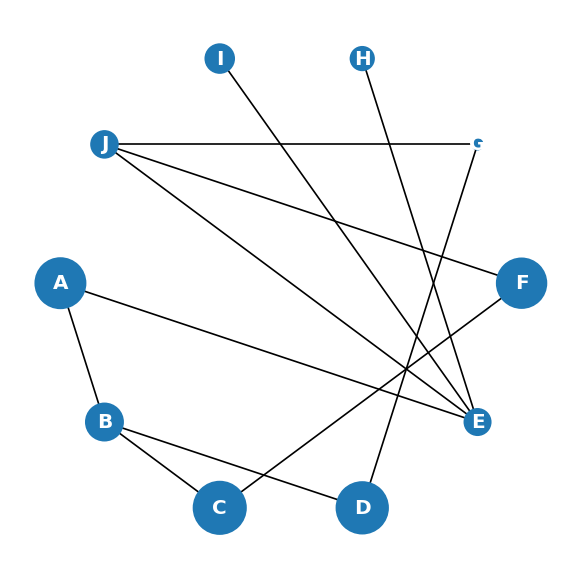

In [16]:
fig,ax=plt.subplots(figsize=(6,6),dpi=120)
networkx.draw(G,pos,
             with_labels=True,
             node_size=[10*node[1]['weight']for node in list(G.nodes(data=True))],
             font_weight='bold',font_color='white',
             ax=ax)
plt.show()


In [17]:
[10*node[1]['weight'] for node in list(G.nodes(data=True))]

[910, 500, 990, 960, 250, 890, 40, 200, 300, 260]

In [18]:
#尋找最短路徑
shortest=networkx.shortest_path(G,source='A',target='J')

In [19]:
shortest

['A', 'E', 'J']

In [20]:
#節點間可能路徑
connections=networkx.all_pairs_node_connectivity(G)
connections

{'A': {'B': 2, 'C': 2, 'D': 2, 'E': 2, 'F': 2, 'G': 2, 'H': 1, 'I': 1, 'J': 2},
 'B': {'A': 2, 'C': 2, 'D': 2, 'E': 2, 'F': 2, 'G': 2, 'H': 1, 'I': 1, 'J': 3},
 'C': {'A': 2, 'B': 2, 'D': 2, 'E': 2, 'F': 2, 'G': 2, 'H': 1, 'I': 1, 'J': 2},
 'D': {'A': 2, 'B': 2, 'C': 2, 'E': 2, 'F': 2, 'G': 2, 'H': 1, 'I': 1, 'J': 2},
 'E': {'A': 2, 'B': 2, 'C': 2, 'D': 2, 'F': 2, 'G': 2, 'H': 1, 'I': 1, 'J': 2},
 'F': {'A': 2, 'B': 2, 'C': 2, 'D': 2, 'E': 2, 'G': 2, 'H': 1, 'I': 1, 'J': 2},
 'G': {'A': 2, 'B': 2, 'C': 2, 'D': 2, 'E': 2, 'F': 2, 'H': 1, 'I': 1, 'J': 2},
 'H': {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1, 'I': 1, 'J': 1},
 'I': {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1, 'H': 1, 'J': 1},
 'J': {'A': 2, 'B': 3, 'C': 2, 'D': 2, 'E': 2, 'F': 2, 'G': 2, 'H': 1, 'I': 1}}

In [21]:
start_node='A'
for traget_node in connections[start_node]:
    print('%s-%s:%3d'%(start_node,traget_node,connections[start_node][traget_node]))

A-B:  2
A-C:  2
A-D:  2
A-E:  2
A-F:  2
A-G:  2
A-H:  1
A-I:  1
A-J:  2
